### Uniques

1_Splitdf.ipynb notebook was made to split the three different categories of corrosion TL, after it was determine that the Microbiological data correspond to a no normal distribution

2_Filtering.ipynb notebook was done to identify the most relevant bacteria genus amongts the 880 genus by filering out the percentage that is in a concentration of less than 2% and 
additionally it sorted those left by the occurence in the totality of each traffic light category, by making a column named influence and order them for influence frequency.
An statistical analysis using non parametric test give us a list of the GIDs to use on each TL category.

This notebook would comprise:

Now I compare the three categories of bacteria genus. So this visualisation only not for the subsequent analysis, we assume that if a genus 
belong to all the categories, we focus on the unique GIDs considering that may be more relevant to see the differences and perhaps more relevant regarding corrosion. If the GID were relevant, why then is not associated with a corrosion traffic light? if were relevant it should have also caused corrosion on the traffic light. So first we identify this common Genus/GIDs intersection so not to put them on the comparison.

In [1]:
# Import the pandas library for data manipulation
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the display precision for floats
pd.options.display.float_format = "{:.4f}".format

This df come from the first notebook split

In [3]:
Influencers_TL1 = pd.read_csv("data/Influencers_TL1.csv", dtype={i: float for i in range(8, 71)})
Influencers_TL2 = pd.read_csv("data/Influencers_TL2.csv", dtype={i: float for i in range(8, 71)})
Influencers_TL3 = pd.read_csv("data/Influencers_TL3.csv", dtype={i: float for i in range(8, 71)})

In [4]:
# Get the GIDs for each DataFrame
gids_1 = set(Influencers_TL1["GID"])
gids_2 = set(Influencers_TL2["GID"])
gids_3 = set(Influencers_TL3["GID"])

In [11]:
# Find the GIDs common in all three DataFrames
common_gids = gids_1.intersection(gids_2).intersection(gids_3)
common_gids_22 = gids_2.intersection(gids_3)

So now we make a list of all the uniquenes of our bacteria

In [9]:
# Find the unique GIDs in Influencers_2 and Influencers_3 with respect to Influencers_1
unique_gids_1 = gids_1.difference(common_gids)
unique_gids_2 = gids_2.difference(gids_1).difference(common_gids)
unique_gids_3 = gids_3.difference(gids_1).difference(common_gids)

In [8]:
print("Unique GIDs in Influencers_TL1 with respect to common GIDs:", unique_gids_1)
print("Unique GIDs in Influencers_TL2 with respect to Influencers_TL1:", unique_gids_2)
print("Unique GIDs in Influencers_TL3 with respect to Influencers_TL1:", unique_gids_3)
print("Common GIDs in all Influencers_TL:", common_gids)

Unique GIDs in Influencers_TL1 with respect to common GIDs: {130, 255, 525, 400, 660, 533, 23, 538, 540, 800, 674, 162, 676, 549, 678, 679, 40, 804, 304, 177, 565, 181, 569, 315, 712, 589, 206, 334, 209, 723, 725, 91, 606, 862, 351, 864, 863, 871, 625, 371, 375, 761, 251, 767}
Unique GIDs in Influencers_TL2 with respect to Influencers_TL1: {7, 519, 265, 267, 13, 273, 274, 277, 408, 29, 30, 675, 296, 425, 171, 437, 695, 441, 571, 187, 827, 574, 703, 581, 453, 455, 719, 82, 339, 596, 853, 214, 599, 344, 859, 95, 736, 609, 354, 867, 229, 614, 230, 360, 490, 238, 121, 634}
Unique GIDs in Influencers_TL3 with respect to Influencers_TL1: {7, 13, 526, 408, 281, 414, 670, 35, 166, 42, 43, 429, 437, 566, 695, 574, 322, 581, 69, 583, 584, 453, 455, 719, 80, 336, 467, 724, 341, 214, 599, 344, 217, 602, 859, 471, 478, 226, 354, 867, 229, 230, 615, 490, 118, 503, 634}
Common GIDs in all Influencers_TL: {6, 647, 136, 269, 270, 143, 271, 17, 146, 659, 20, 664, 671, 550, 683, 687, 572, 575, 705, 449, 

### Unique Columns Dataframe Extraction
I did no manage the programatically join the two df, so I did it on excel. The operation consisted of taking the taxa.xlsx information from the df just done in the previous snipets and join them to the original df Biotot.xlsx.

Now having the unique genera for each category, we going corroborate that indeed the Gids or Genus are only on one of the categories, we can do it iterating on a df or we can use a plot that indicate if a genus belong to more than one category.

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
# Read the excel file
Jointax = pd.read_excel('data/Jointax.xlsx', sheet_name='Biotot_jointax', header=[0,1,2,3,4,5,6,7])#, sort=False)#, dtype={i: float for i in range(2, 882)})
Jointax["Sites"]= Jointax["Sites"].astype(str)
Jointax["Category"]= Jointax["Category"].astype(int)

Jointax= Jointax.set_index("Sites")
#Correcting the Tuple-like Index
Jointax.index = Jointax.index.map(lambda x: x[0] if isinstance(x, tuple) else x)

# PCA

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
def plot_dendrogram(df, title):
    """
    Plot a dendrogram for the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to create a dendrogram for.
    title (str): The title for the dendrogram plot.
    """

    # Exclude the 'GID', 'Influence', and taxonomic columns and transpose the DataFrame
    df_filtered = df.drop(columns=['GID', 'Influence', 'Kingdom', 'Phylum', 'Class', 'Order', 'Familia', 'Genera']).transpose()

    g = sns.clustermap(df_filtered, cmap="viridis", figsize=(10, 8))
    g.ax_heatmap.set_title(title)
    g.fig.show()




The dendrograms generated visualize the hierarchical clustering of samples (sites) based on the abundance of GIDs. The y-axis represents the samples, while the x-axis shows the distance or dissimilarity between the samples, which is determined by the clustering algorithm. The closer the samples are on the x-axis, the more similar their abundance profiles are.

The numbers on the x-axis represent the linkage distances between clusters. They give an idea of how dissimilar the clusters are. A higher value indicates that the clusters being joined are more dissimilar.

/tmp/ipykernel_6416/2582811261.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.fig.show()


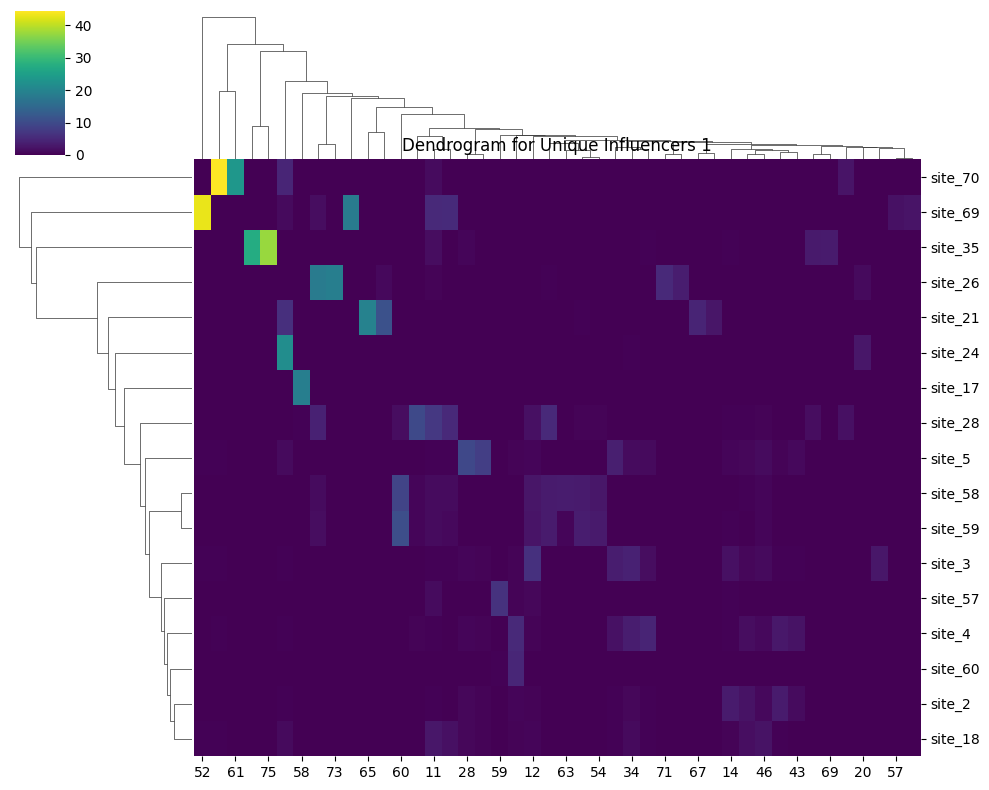

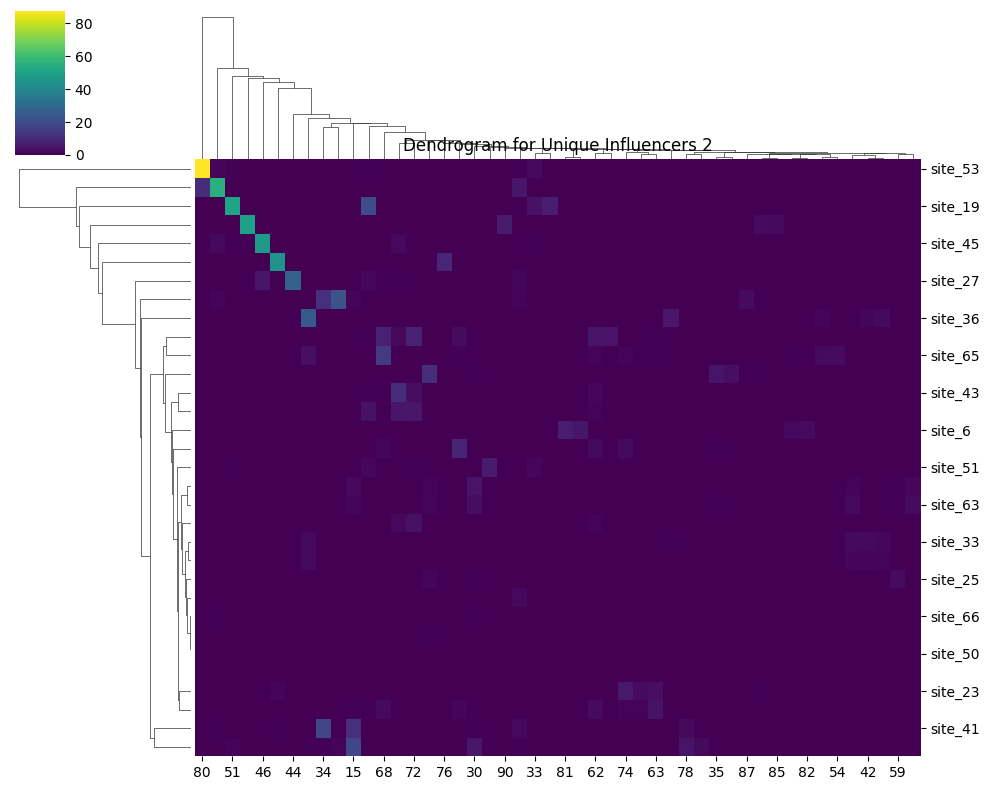

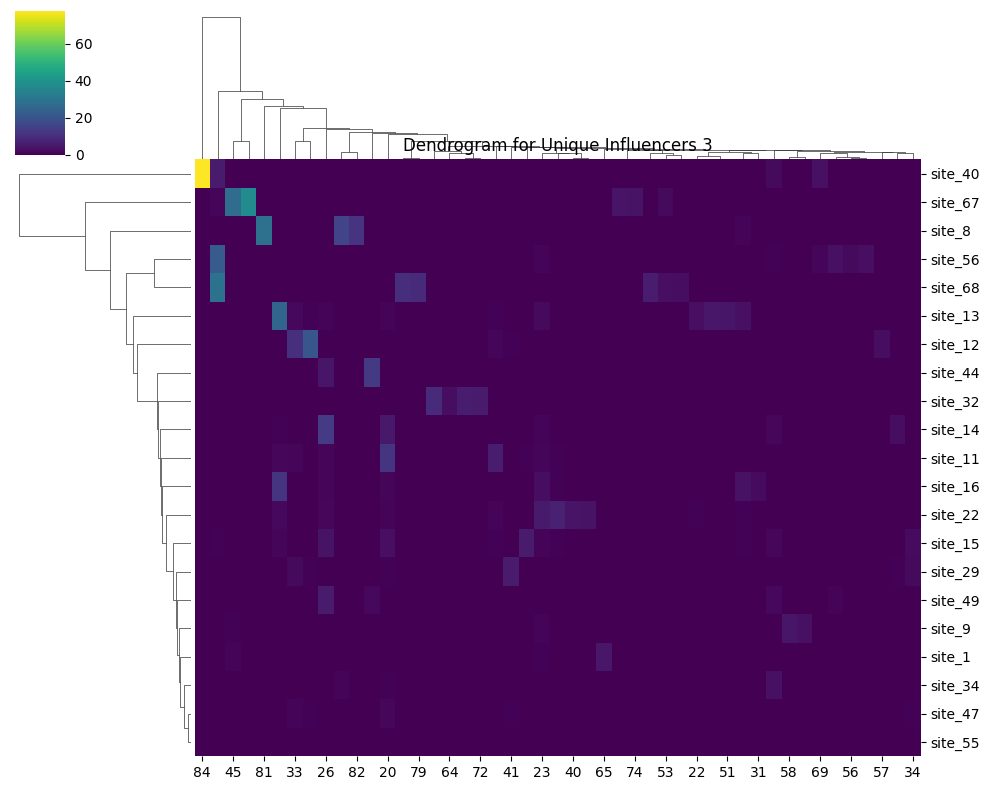

In [15]:
plot_dendrogram(unique_influencers_1, "Dendrogram for Unique Influencers 1")
plot_dendrogram(unique_influencers_2, "Dendrogram for Unique Influencers 2")
plot_dendrogram(unique_influencers_3, "Dendrogram for Unique Influencers 3")

## Dendrograms based on taxonomic levels instead of abundance values

Aggregate the abundance values at the desired taxonomic level, such as the genus level. Then the data is grouped by the taxonomic column (e.g., 'Genera') and summing the abundance values.

In [16]:
def plot_dendrogram_by_taxonomy(df, taxonomic_level, title):
    """
    Plot a dendrogram for the given DataFrame grouped by a specific taxonomic level.

    Parameters:
    df (pd.DataFrame): The DataFrame to create a dendrogram for.
    taxonomic_level (str): The taxonomic level to group the data by (e.g., 'Genera').
    title (str): The title for the dendrogram plot.
    """

    # Group by the desired taxonomic level and sum the abundance values
    df_grouped = df.groupby(taxonomic_level).sum()

    # Drop the 'GID' and 'Influence' columns
    df_grouped = df_grouped.drop(columns=['GID', 'Influence'])

    # Transpose the DataFrame
    df_grouped_transposed = df_grouped.transpose()

    # Generate the dendrogram
    g = sns.clustermap(df_grouped_transposed, cmap="viridis", figsize=(10, 8))
    g.ax_heatmap.set_title(title)
    g.fig.show()

### Dendrograms display the hierarchical clustering of sites based on their microbial community composition at a specific taxonomic level (e.g., 'Genera').
The x-axis represents the taxonomic categories (e.g., genera) and the y-axis represents the different sites. Each cell in the heatmap shows the abundance of a specific taxonomic category in a particular site. The darker purple indicates lower abundance (closer to 0), while the lighter yellow indicates higher abundance (>> 40).

The dendrogram shows the hierarchical clustering of sites based on their similarity in microbial composition at the specified taxonomic level. The height of the branches in the dendrogram represents the distance (or dissimilarity) between the sites. If two sites are more similar in their microbial composition, they will be clustered together and have shorter branches. Conversely, if two sites are less similar, they will have longer branches and be further apart in the dendrogram.

The darker purple indicates lower abundance (closer to 0), while the lighter yellow indicates higher abundance (closer to 40).

/tmp/ipykernel_6416/914406916.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.fig.show()


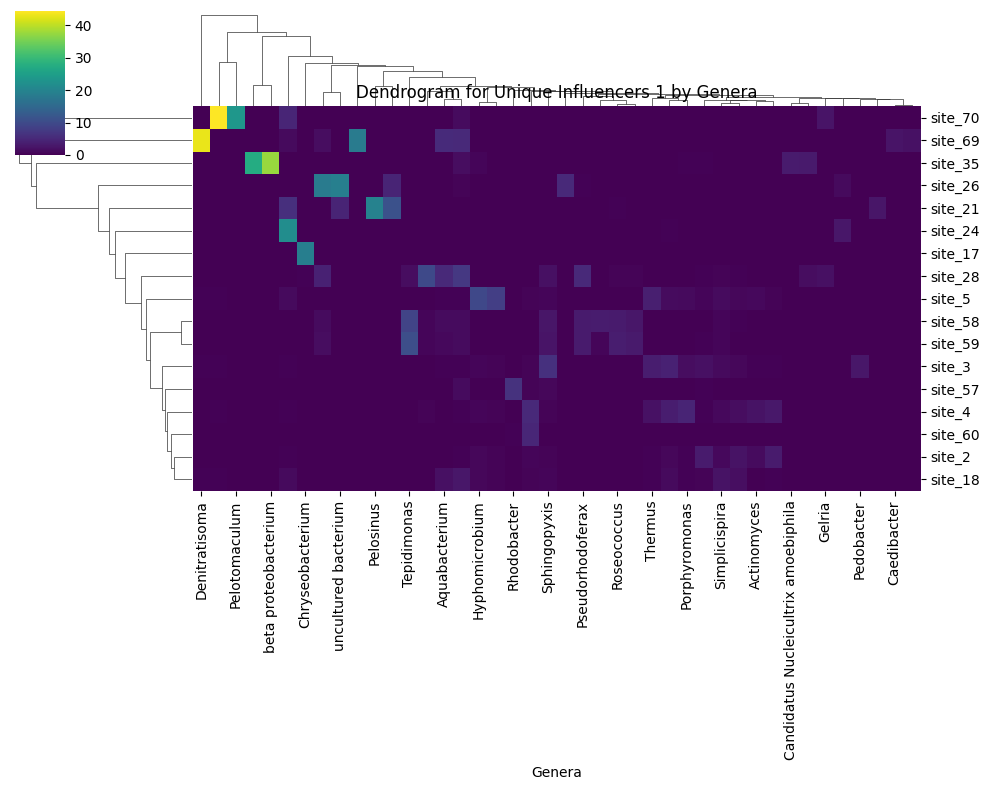

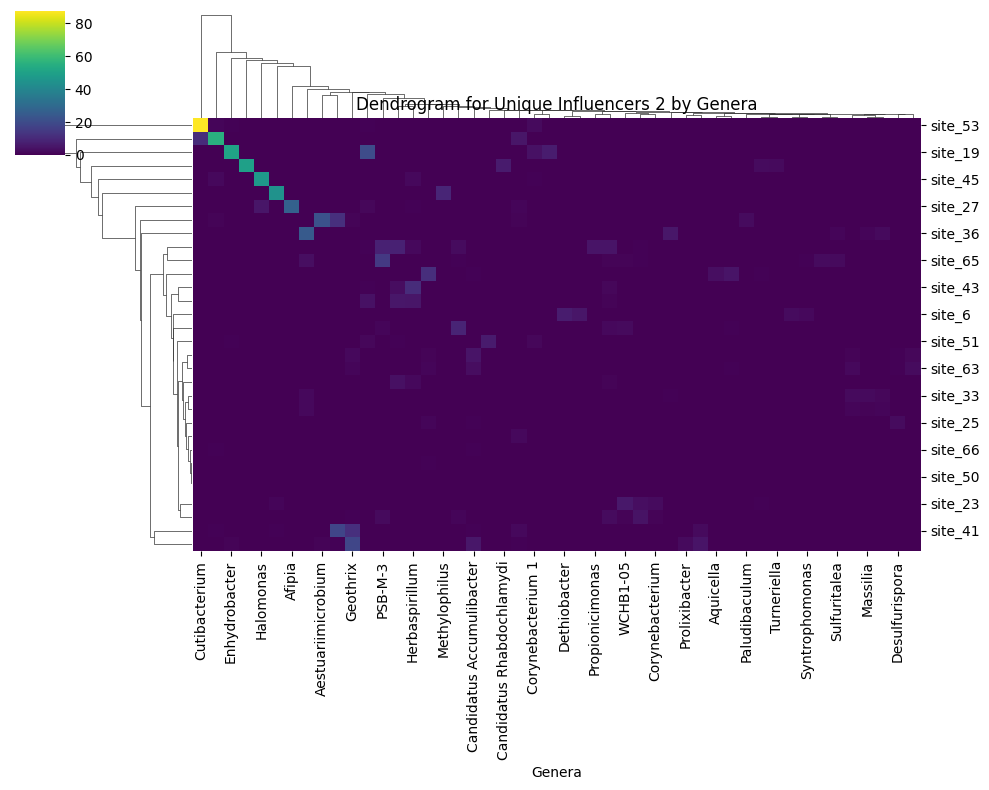

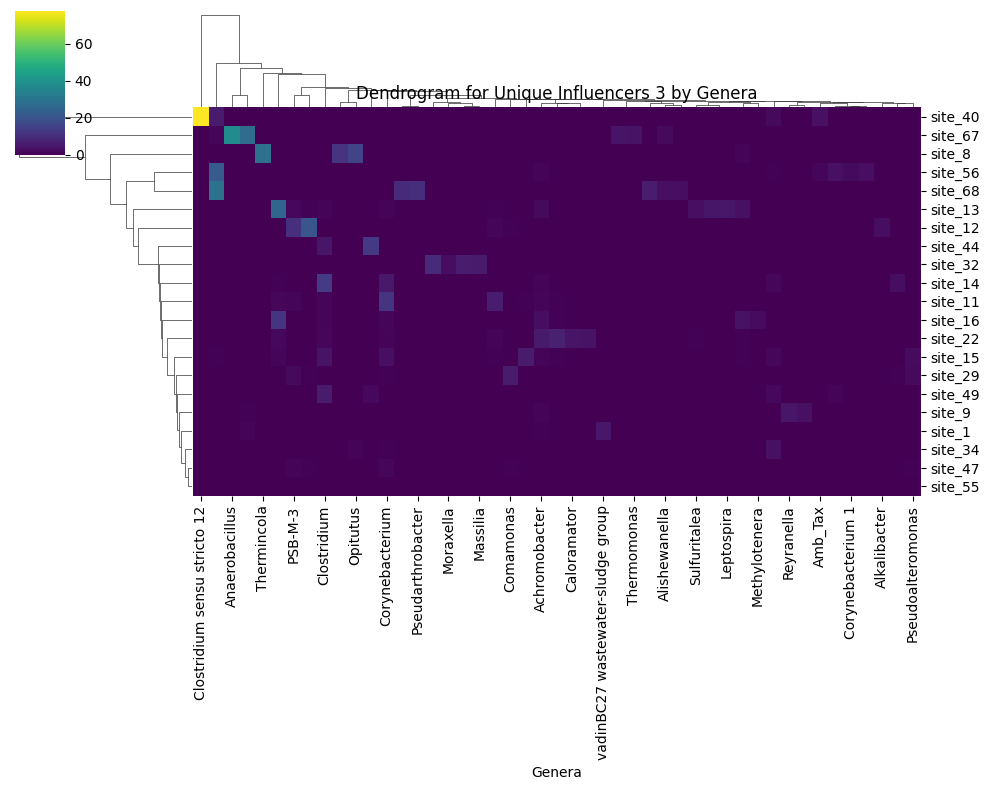

In [17]:
plot_dendrogram_by_taxonomy(unique_influencers_1, 'Genera', "Dendrogram for Unique Influencers 1 by Genera")
plot_dendrogram_by_taxonomy(unique_influencers_2, 'Genera', "Dendrogram for Unique Influencers 2 by Genera")
plot_dendrogram_by_taxonomy(unique_influencers_3, 'Genera', "Dendrogram for Unique Influencers 3 by Genera")
